## Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import style
style.use("ggplot")


## Import data

In [2]:
df = pd.read_csv('https://query.data.world/s/kvyyj24a4fqdqhxdpbwxp4pnmnj2qz', header=None)
df.columns += 1


## Explore data

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


### Variables

In [4]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [5]:
## Select some columns ( 3,4,5,10,15,16,21,22,23,31,34,35,36,37,38,39,40,41,42,47,55,56,57,63,64)

In [6]:
df_segment= df[[3,4,5,10,15,16,21,22,23,31,34,35,36,42,47,55,56,57,63,64]]

In [7]:
df_segment.head()

,3,4,5,10,15,16,21,22,23,31,34,35,36,42,47,55,56,57,63,64
0,3,2,8,7,6,1,1,2,5,8,1,8,1,4,6,0,0,0,0,0
1,2,2,8,6,5,0,0,5,0,7,2,6,3,5,0,0,0,0,0,0
2,2,2,8,3,2,0,0,7,0,2,2,9,0,3,6,0,0,0,0,0
3,3,3,3,5,4,3,0,3,1,4,0,7,2,4,6,0,0,0,0,0
4,4,2,10,7,4,5,4,0,0,5,1,5,4,6,0,0,0,0,0,0


In [8]:
df_segment.columns = ['Avg size of household','Avg Age','Customer Main Type','Percent Married people', 'Percent of Household with children','Percent High Education','Farmer', 'Middle Management','Skilled Laborers','Home Owners', 'No Car','National Health Service','Private Health insurance','Average Income','Contribution to Car policies','Life insurance','Private accidents','Family accidents','property insurance','social security insurance' ]

In [9]:
df_segment.head()

,Avg size of household,Avg Age,Customer Main Type,Percent Married people,Percent of Household with children,Percent High Education,Farmer,Middle Management,Skilled Laborers,Home Owners,No Car,National Health Service,Private Health insurance,Average Income,Contribution to Car policies,Life insurance,Private accidents,Family accidents,property insurance,social security insurance
0,3,2,8,7,6,1,1,2,5,8,1,8,1,4,6,0,0,0,0,0
1,2,2,8,6,5,0,0,5,0,7,2,6,3,5,0,0,0,0,0,0
2,2,2,8,3,2,0,0,7,0,2,2,9,0,3,6,0,0,0,0,0
3,3,3,3,5,4,3,0,3,1,4,0,7,2,4,6,0,0,0,0,0
4,4,2,10,7,4,5,4,0,0,5,1,5,4,6,0,0,0,0,0,0


In [10]:
income = df[[37,38,39,40,41,42]]
income.columns = ["< 30,000", "30,000 - 45,000", '45,000 - 75,000', '75,000 - 120,000', '> 120,000', 'Percent Near Average']

In [11]:
def data_conversion(num):
    percent_dict = {0 : 0, 1 : .05, 2 : .17, 3 : .30, 4 : .43,
                    5 : .56, 6 : .69, 7 : .84, 8 : .94, 9 : 1.0}
    return percent_dict[num]


In [12]:
income = income.applymap(data_conversion)

In [13]:
income.loc[:,'< 30,000'] *= 15000
income.loc[:,'30,000 - 45,000'] *= 37500
income.loc[:, '45,000 - 75,000'] *= 60000
income.loc[:, '75,000 - 120,000'] *= 97500
income.loc[:,'> 120,000'] *= 120000
income['Average Income'] = income.sum(axis = 1)
income.head()

,"< 30,000","30,000 - 45,000","45,000 - 75,000","75,000 - 120,000","> 120,000",Percent Near Average,Average Income
0,0.0,16125.0,33600.0,0.0,0.0,0.43,49725.43
1,2550.0,0.0,33600.0,16575.0,0.0,0.56,52725.56
2,6450.0,21000.0,0.0,0.0,0.0,0.30,27450.30
3,750.0,21000.0,18000.0,0.0,0.0,0.43,39750.43
4,0.0,0.0,60000.0,0.0,0.0,0.69,60000.69


In [14]:
df_segment.loc[:,'Average Income'] = income['Average Income']

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
df_segment.head()

,Avg size of household,Avg Age,Customer Main Type,Percent Married people,Percent of Household with children,Percent High Education,Farmer,Middle Management,Skilled Laborers,Home Owners,No Car,National Health Service,Private Health insurance,Average Income,Contribution to Car policies,Life insurance,Private accidents,Family accidents,property insurance,social security insurance
0,3,2,8,7,6,1,1,2,5,8,1,8,1,49725.43,6,0,0,0,0,0
1,2,2,8,6,5,0,0,5,0,7,2,6,3,52725.56,0,0,0,0,0,0
2,2,2,8,3,2,0,0,7,0,2,2,9,0,27450.30,6,0,0,0,0,0
3,3,3,3,5,4,3,0,3,1,4,0,7,2,39750.43,6,0,0,0,0,0
4,4,2,10,7,4,5,4,0,0,5,1,5,4,60000.69,0,0,0,0,0,0


In [16]:
df_segment.corr()

,Avg size of household,Avg Age,Customer Main Type,Percent Married people,Percent of Household with children,Percent High Education,Farmer,Middle Management,Skilled Laborers,Home Owners,No Car,National Health Service,Private Health insurance,Average Income,Contribution to Car policies,Life insurance,Private accidents,Family accidents,property insurance,social security insurance
Avg size of household,1.000000,-0.328257,0.016115,0.534798,0.794014,0.008053,0.106960,-0.004949,0.037590,0.338389,-0.401747,-0.073419,0.073875,0.310369,0.021131,0.025971,0.003841,0.016483,0.013003,0.034550
Avg Age,-0.328257,1.000000,0.003872,-0.040384,-0.355754,-0.025792,0.090716,-0.162686,-0.048103,-0.023182,0.197608,-0.122024,0.124200,-0.117847,-0.015417,-0.029134,0.019855,-0.006816,-0.013612,-0.019373
Customer Main Type,0.016115,0.003872,1.000000,-0.026619,0.058619,-0.471620,0.276882,-0.219405,0.305282,-0.119223,0.125238,0.339905,-0.340296,-0.282633,-0.005723,-0.040328,0.030780,-0.013076,-0.017168,-0.057235
Percent Married people,0.534798,-0.040384,-0.026619,1.000000,0.500354,0.075038,0.019761,-0.007196,0.026831,0.392495,-0.610018,-0.229339,0.232261,0.374196,0.026108,0.031553,0.016907,0.020882,-0.008661,0.036115
Percent of Household with children,0.794014,-0.355754,0.058619,0.500354,1.000000,-0.036045,0.028367,-0.033131,0.113677,0.239638,-0.339481,-0.033914,0.031632,0.250423,0.032783,0.025710,0.006133,0.015703,0.009079,0.023214
Percent High Education,0.008053,-0.025792,-0.471620,0.075038,-0.036045,1.000000,-0.125380,0.041374,-0.339358,0.228864,-0.156832,-0.520919,0.518464,0.454773,-0.000823,0.028076,-0.015620,0.009333,0.021758,0.036567
Farmer,0.106960,0.090716,0.276882,0.019761,0.028367,-0.125380,1.000000,-0.284217,-0.067762,0.189069,0.034167,-0.047194,0.045782,-0.027101,-0.039911,-0.005850,0.030459,0.005500,-0.020287,-0.026897
Middle Management,-0.004949,-0.162686,-0.219405,-0.007196,-0.033131,0.041374,-0.284217,1.000000,-0.352505,-0.018382,-0.091170,-0.001987,0.004459,0.066209,0.010795,0.008997,-0.015137,-0.001946,0.007391,0.037209
Skilled Laborers,0.037590,-0.048103,0.305282,0.026831,0.113677,-0.339358,-0.067762,-0.352505,1.000000,-0.129544,0.065512,0.394991,-0.396338,-0.238662,-0.002827,-0.011971,0.010630,0.004349,-0.003400,-0.047780
Home Owners,0.338389,-0.023182,-0.119223,0.392495,0.239638,0.228864,0.189069,-0.018382,-0.129544,1.000000,-0.396140,-0.366491,0.366036,0.484630,0.008333,0.039674,-0.002056,0.021757,0.008092,0.041627


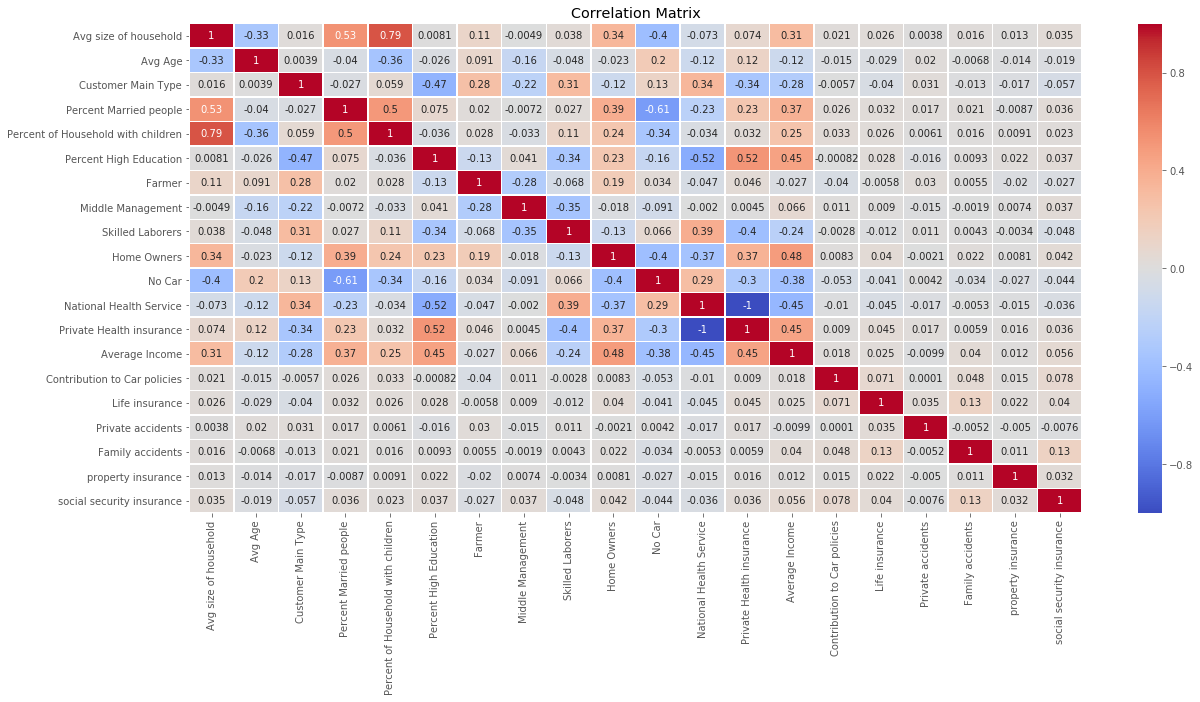

In [17]:
corrMatrix = df_segment.corr()
plt.figure(figsize = (20,9))

sns.heatmap(corrMatrix, annot=True, linewidths=0.5, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [18]:
scaler = StandardScaler()
segment_std = scaler.fit_transform(df_segment)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
df_segment.dtypes

Avg size of household                   int64
Avg Age                                 int64
Customer Main Type                      int64
Percent Married people                  int64
Percent of Household with children      int64
Percent High Education                  int64
Farmer                                  int64
Middle Management                       int64
Skilled Laborers                        int64
Home Owners                             int64
No Car                                  int64
National Health Service                 int64
Private Health insurance                int64
Average Income                        float64
Contribution to Car policies            int64
Life insurance                          int64
Private accidents                       int64
Family accidents                        int64
property insurance                      int64
social security insurance               int64
dtype: object

In [20]:
hier_clust=linkage(segment_std, method='ward')

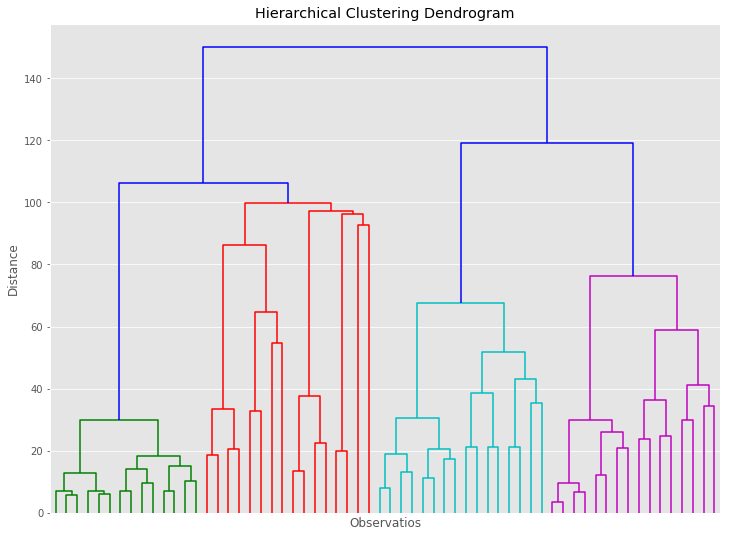

In [21]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observatios")
plt.ylabel("Distance")
dendrogram(hier_clust,  
           truncate_mode='level',
           p=5,
          show_leaf_counts=False,
          no_labels=True,
          )
plt.show()

In [23]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segment_std)
    wcss.append(kmeans.inertia_)

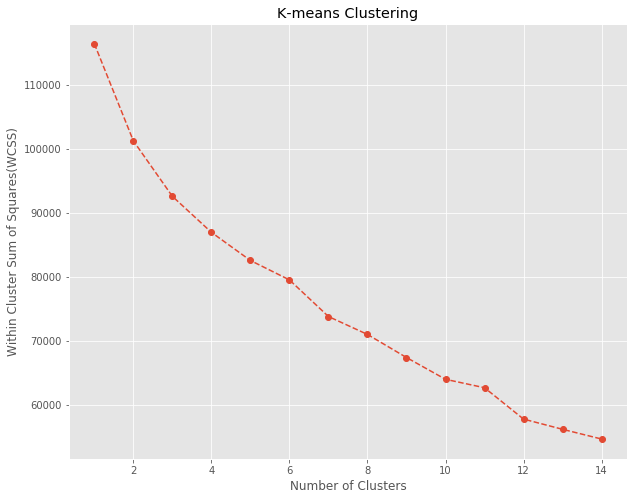

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15),wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.title('K-means Clustering')
plt.show()

In [31]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(segment_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [32]:
df_segm_kmeans = df_segment.copy()
df_segm_kmeans['Segmentation K-means'] = kmeans.labels_

In [33]:
df_segm_analysis=df_segm_kmeans.groupby(['Segmentation K-means']).mean()
df_segm_analysis

,Avg size of household,Avg Age,Customer Main Type,Percent Married people,Percent of Household with children,Percent High Education,Farmer,Middle Management,Skilled Laborers,Home Owners,No Car,National Health Service,Private Health insurance,Average Income,Contribution to Car policies,Life insurance,Private accidents,Family accidents,property insurance,social security insurance
Segmentation K-means,,,,,,,,,,,,,,,,,,,,
0,1.965398,3.257538,5.832921,4.564014,2.676718,1.141374,0.327237,3.121107,2.116658,2.717252,3.165101,7.016312,1.987148,33904.939382,2.854671,0.126545,0.008403,0.000000,0.008898,0.024221
1,3.113305,2.793136,7.720263,6.961918,5.434415,0.674189,0.842501,2.338975,3.160320,5.199812,1.653503,7.098731,1.904560,41931.377635,2.988246,0.169723,0.021157,0.000000,0.015045,0.023037
2,2.992656,2.919829,3.174419,7.162791,4.825581,2.878825,0.345165,3.354345,1.121175,6.736842,0.881273,4.293758,4.718482,55110.354033,3.052020,0.277846,0.011016,0.000000,0.023868,0.093635
3,2.842105,2.973684,5.421053,6.710526,4.657895,1.552632,0.605263,2.842105,2.315789,5.684211,1.263158,6.210526,2.815789,48943.871579,4.631579,1.657895,0.000000,2.342105,0.052632,0.684211
